In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [75]:
deaths = pd.read_csv("LEADINGCAUSESOFDEATH.csv")
deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Columns: 235 entries, State_FIPS_Code to LCD_Time_Span
dtypes: int64(231), object(4)
memory usage: 5.6+ MB


In [76]:
##Convert -1,-1111,-1111,1,-2,-2222,-2222.2 which means missing data to NAN
     
def convert_nan(data):
    if data == -1111 or data == -2222 or data == -1 or data == -1111.1 or data == -2222.2 or data == -2 or data == -9999 or data == -9998.9:
        return np.nan
    else:
        return data

##Eliminate Confidence Intervals
def eliminate_CI(data):
    for i in data.columns:
        if "CI" in i:
            data = data.drop([i],1)
    return data

In [77]:
for i in deaths.columns:
    deaths[i] = deaths[i].apply(convert_nan)
##Get rid of confidence intervals for the sake of multi-dimensionality 
deaths = eliminate_CI(deaths)

In [78]:
for i in deaths.columns:
    if float((deaths[i].isnull().sum()))/len(deaths) >.5:
        deaths = deaths.drop(i,1)
for i in deaths.columns:
    print (i ,float((deaths[i].isnull().sum()))/len(deaths))

State_FIPS_Code 0.0
County_FIPS_Code 0.0
CHSI_County_Name 0.0
CHSI_State_Name 0.0
CHSI_State_Abbr 0.0
Strata_ID_Number 0.0
C_Wh_Injury 0.45877109200891436
D_Wh_Injury 0.12129894937917861
D_Wh_Cancer 0.1964342566061764
D_Wh_HeartDis 0.3288761540910538
D_Wh_Suicide 0.4600445717924228
E_Wh_Cancer 0.022604266157274754
E_Wh_HeartDis 0.022922636103151862
F_Wh_HeartDis 0.0057306590257879654
F_Wh_Cancer 0.0057306590257879654
LCD_Time_Span 0.0


In [79]:
importance = pd.read_csv("RELATIVEHEALTHIMPORTANCE.csv")

In [80]:
for i in importance.columns:
    importance[i] = importance[i].apply(convert_nan)
for i in importance.columns:
    if float((importance[i].isnull().sum()))/len(importance) > .5:
        importance = importance.drop(i,1)
for i in importance.columns:
    print (i ,float((importance[i].isnull().sum()))/len(importance))

State_FIPS_Code 0.0
County_FIPS_Code 0.0
CHSI_County_Name 0.0
CHSI_State_Name 0.0
CHSI_State_Abbr 0.0
Strata_ID_Number 0.0
RHI_LBW_Ind 0.009869468322190385
RHI_VLBW_Ind 0.06844953836357848
RHI_Premature_Ind 0.005412289079910856
RHI_Under_18_Ind 0.025151225724291626
RHI_Over_40_Ind 0.041388092964024195
RHI_Unmarried_Ind 0.002228589621139764
RHI_Late_Care_Ind 0.034702324100604906
RHI_Infant_Mortality_Ind 0.08564151544094238
RHI_IM_Wh_Non_Hisp_Ind 0.13658070678127984
RHI_IM_Neonatal_Ind 0.09137217446673034
RHI_IM_Postneonatal_Ind 0.09296402419611588
RHI_Brst_Cancer_Ind 0.1244826488379497
RHI_Col_Cancer_Ind 0.07163323782234957
RHI_CHD_Ind 0.0060490289716650745
RHI_Lung_Cancer_Ind 0.024832855778414518
RHI_MVA_Ind 0.057624960203756764
RHI_Stroke_Ind 0.021330786373766317
RHI_Suicide_Ind 0.16650748169372812
RHI_Injury_Ind 0.05858007004138809


In [81]:
environment = pd.read_csv("VUNERABLEPOPSANDENVHEALTH.csv")
environment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 28 columns):
State_FIPS_Code           3141 non-null int64
County_FIPS_Code          3141 non-null int64
CHSI_County_Name          3141 non-null object
CHSI_State_Name           3141 non-null object
CHSI_State_Abbr           3141 non-null object
Strata_ID_Number          3141 non-null int64
No_HS_Diploma             3141 non-null int64
Unemployed                3141 non-null int64
Sev_Work_Disabled         3141 non-null int64
Major_Depression          3141 non-null int64
Recent_Drug_Use           3141 non-null int64
Ecol_Rpt                  3141 non-null int64
Ecol_Rpt_Ind              3141 non-null int64
Ecol_Exp                  3141 non-null int64
Salm_Rpt                  3141 non-null int64
Salm_Rpt_Ind              3141 non-null int64
Salm_Exp                  3141 non-null int64
Shig_Rpt                  3141 non-null int64
Shig_Rpt_Ind              3141 non-null int64
Shig_Exp        

In [82]:
for i in environment.columns:
    environment[i] = environment[i].apply(convert_nan)
for i in environment.columns:
    if float((environment[i].isnull().sum()))/len(environment) > .5:
        environment = environment.drop(i,1)
for i in environment.columns:
    print (i ,float((environment[i].isnull().sum()))/len(environment))

State_FIPS_Code 0.0
County_FIPS_Code 0.0
CHSI_County_Name 0.0
CHSI_State_Name 0.0
CHSI_State_Abbr 0.0
Strata_ID_Number 0.0
No_HS_Diploma 0.0003183699458771092
Unemployed 0.0025469595670168737
Sev_Work_Disabled 0.008914358484559057
Major_Depression 0.0
Recent_Drug_Use 0.0
Ecol_Rpt 0.0003183699458771092
Ecol_Rpt_Ind 0.0003183699458771092
Ecol_Exp 0.0003183699458771092
Salm_Rpt 0.0003183699458771092
Salm_Rpt_Ind 0.0003183699458771092
Salm_Exp 0.0003183699458771092
Shig_Rpt 0.0003183699458771092
Shig_Rpt_Ind 0.0003183699458771092
Shig_Exp 0.0003183699458771092
Toxic_Chem 0.23973256924546324
Carbon_Monoxide_Ind 0.0
Nitrogen_Dioxide_Ind 0.0
Sulfur_Dioxide_Ind 0.0
Ozone_Ind 0.0
Particulate_Matter_Ind 0.0
Lead_Ind 0.0
EH_Time_Span 0.0


In [83]:
preventive = pd.read_csv("PREVENTIVESERVICESUSE.csv")
preventive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 43 columns):
State_FIPS_Code       3141 non-null int64
County_FIPS_Code      3141 non-null int64
CHSI_County_Name      3141 non-null object
CHSI_State_Name       3141 non-null object
CHSI_State_Abbr       3141 non-null object
Strata_ID_Number      3141 non-null int64
FluB_Rpt              3141 non-null int64
FluB_Ind              3141 non-null int64
FluB_Exp              3141 non-null int64
HepA_Rpt              3141 non-null int64
HepA_Ind              3141 non-null int64
HepA_Exp              3141 non-null int64
HepB_Rpt              3141 non-null int64
HepB_Ind              3141 non-null int64
HepB_Exp              3141 non-null int64
Meas_Rpt              3141 non-null int64
Meas_Ind              3141 non-null int64
Meas_Exp              3141 non-null int64
Pert_Rpt              3141 non-null int64
Pert_Ind              3141 non-null int64
Pert_Exp              3141 non-null int64
CRS_Rpt 

In [84]:
for i in preventive.columns:
    preventive[i] = preventive[i].apply(convert_nan)
for i in preventive.columns:
    if float((preventive[i].isnull().sum()))/len(preventive) > .5:
        preventive = preventive.drop(i,1)
for i in preventive.columns:
    print (i ,float((preventive[i].isnull().sum()))/len(preventive))

State_FIPS_Code 0.0
County_FIPS_Code 0.0
CHSI_County_Name 0.0
CHSI_State_Name 0.0
CHSI_State_Abbr 0.0
Strata_ID_Number 0.0
FluB_Rpt 0.0003183699458771092
FluB_Ind 0.0003183699458771092
FluB_Exp 0.0003183699458771092
HepA_Rpt 0.0003183699458771092
HepA_Ind 0.0003183699458771092
HepA_Exp 0.0003183699458771092
HepB_Rpt 0.0003183699458771092
HepB_Ind 0.0003183699458771092
HepB_Exp 0.0003183699458771092
Meas_Rpt 0.0003183699458771092
Meas_Ind 0.0003183699458771092
Meas_Exp 0.0003183699458771092
Pert_Rpt 0.0003183699458771092
Pert_Ind 0.0003183699458771092
Pert_Exp 0.0003183699458771092
CRS_Rpt 0.0003183699458771092
CRS_Ind 0.0003183699458771092
CRS_Exp 0.0003183699458771092
Syphilis_Rpt 0.0003183699458771092
Syphilis_Ind 0.0003183699458771092
Syphilis_Exp 0.0003183699458771092
ID_Time_Span 0.0


In [85]:
risk_care = pd.read_csv("RISKFACTORSANDACCESSTOCARE.csv")
risk_care.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 31 columns):
State_FIPS_Code                3141 non-null int64
County_FIPS_Code               3141 non-null int64
CHSI_County_Name               3141 non-null object
CHSI_State_Name                3141 non-null object
CHSI_State_Abbr                3141 non-null object
Strata_ID_Number               3141 non-null int64
No_Exercise                    3141 non-null float64
CI_Min_No_Exercise             3141 non-null float64
CI_Max_No_Exercise             3141 non-null float64
Few_Fruit_Veg                  3141 non-null float64
CI_Min_Fruit_Veg               3141 non-null float64
CI_Max_Fruit_Veg               3141 non-null float64
Obesity                        3141 non-null float64
CI_Min_Obesity                 3141 non-null float64
CI_Max_Obesity                 3141 non-null float64
High_Blood_Pres                3141 non-null float64
CI_Min_High_Blood_Pres         3141 non-null float64
C

In [86]:
risk_care = eliminate_CI(risk_care)
for i in risk_care.columns:
    risk_care[i] = risk_care[i].apply(convert_nan)
for i in risk_care.columns:
    if float((risk_care[i].isnull().sum()))/len(risk_care) > .5:
        risk_care = risk_care.drop(i,1)
for i in risk_care.columns:
    print (i ,float((risk_care[i].isnull().sum()))/len(risk_care))
risk_care = eliminate_CI(risk_care)

State_FIPS_Code 0.0
County_FIPS_Code 0.0
CHSI_County_Name 0.0
CHSI_State_Name 0.0
CHSI_State_Abbr 0.0
Strata_ID_Number 0.0
No_Exercise 0.2976758993950971
Few_Fruit_Veg 0.3938236230499841
Obesity 0.29194524036930913
Smoker 0.2782553326965934
Diabetes 0.1343521171601401
Uninsured 0.0009551098376313276
Elderly_Medicare 0.009869468322190385
Disabled_Medicare 0.010187838268067495
Prim_Care_Phys_Rate 0.0
Dentist_Rate 0.0003183699458771092
Community_Health_Center_Ind 0.0
HPSA_Ind 0.0


In [87]:
demographics = pd.read_csv('DEMOGRAPHICS.csv')
demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 44 columns):
State_FIPS_Code               3141 non-null int64
County_FIPS_Code              3141 non-null int64
CHSI_County_Name              3141 non-null object
CHSI_State_Name               3141 non-null object
CHSI_State_Abbr               3141 non-null object
Strata_ID_Number              3141 non-null int64
Strata_Determining_Factors    3141 non-null object
Number_Counties               3141 non-null int64
Population_Size               3141 non-null int64
Min_Population_Size           3141 non-null int64
Max_Population_Size           3141 non-null int64
Population_Density            3141 non-null int64
Min_Population_Density        3141 non-null int64
Max_Population_Density        3141 non-null int64
Poverty                       3141 non-null float64
Min_Poverty                   3141 non-null float64
Max_Poverty                   3141 non-null float64
Age_19_Under                  314

In [88]:
for i in demographics.columns:
    demographics[i] = demographics[i].apply(convert_nan)
for i in demographics.columns:
    if float((demographics[i].isnull().sum()))/len(demographics) > .5:
        demographics = demographics.drop(i,1)
for i in demographics.columns:
    if "Max" in i:
        demographics = demographics.drop(i, axis = 1)
    elif "Min" in i:
        demographics = demographics.drop(i, axis = 1)
    else:
        pass
for i in demographics.columns:
    print (i ,float((demographics[i].isnull().sum()))/len(demographics))

State_FIPS_Code 0.0
County_FIPS_Code 0.0
CHSI_County_Name 0.0
CHSI_State_Name 0.0
CHSI_State_Abbr 0.0
Strata_ID_Number 0.0
Strata_Determining_Factors 0.0
Number_Counties 0.0
Population_Size 0.0
Population_Density 0.0003183699458771092
Poverty 0.0003183699458771092
Age_19_Under 0.0
Age_19_64 0.0
Age_65_84 0.0
Age_85_and_Over 0.0
White 0.0
Black 0.0
Native_American 0.0
Asian 0.0
Hispanic 0.0


In [89]:
## Since some data sets have different lengths of time for the statistic that was calculated this function
## returns the length of time for the statistic that was recorded in a new column
def years(data):
    for i in data.columns:
        if "Time" in i:
            column = i
    data["Number_Years"] = data[column].apply(lambda x: int(x.split("-")[1])-int(x.split("-")[0]))
    return data

In [90]:
data_with_time_values = [preventive, environment, deaths]
for i in data_with_time_values:
    i = years(i)

In [91]:
redundant_columns = ["State_FIPS_Code","County_FIPS_Code","CHSI_County_Name","CHSI_State_Name","CHSI_State_Abbr","Strata_ID_Number"]

In [92]:
demographics = demographics.drop(redundant_columns,1)
environment = environment.drop(redundant_columns,1)
preventive = preventive.drop(redundant_columns,1)
importance = importance.drop(redundant_columns,1)
deaths = deaths.drop(redundant_columns,1)

In [93]:
data_sets = [risk_care, demographics, environment, preventive, importance, deaths]
for i in data_sets:
    print (len(i.columns))

18
14
23
23
19
11


In [94]:
nans = risk_care[risk_care["Obesity"].isnull()==True]
risk_care2 = risk_care[risk_care["Obesity"].isnull()==False]

In [95]:
rows_to_keep = risk_care2.index.values
demographics2 = demographics.ix[rows_to_keep]
environment2 = environment.ix[rows_to_keep]
deaths2 = deaths.ix[rows_to_keep]
preventive2 = preventive.ix[rows_to_keep]
importance2 = importance.ix[rows_to_keep]

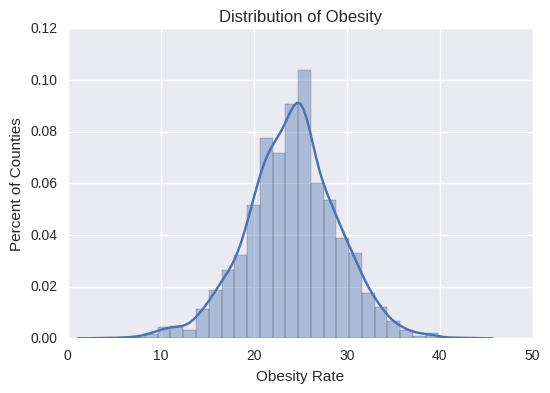

In [96]:
r = risk_care.drop(redundant_columns,1)
sns.distplot(r["Obesity"].dropna(),bins = 28);
plt.title("Distribution of Obesity")
plt.xlabel("Obesity Rate")
plt.ylabel("Percent of Counties")
plt.figure(figsize = (20,20));

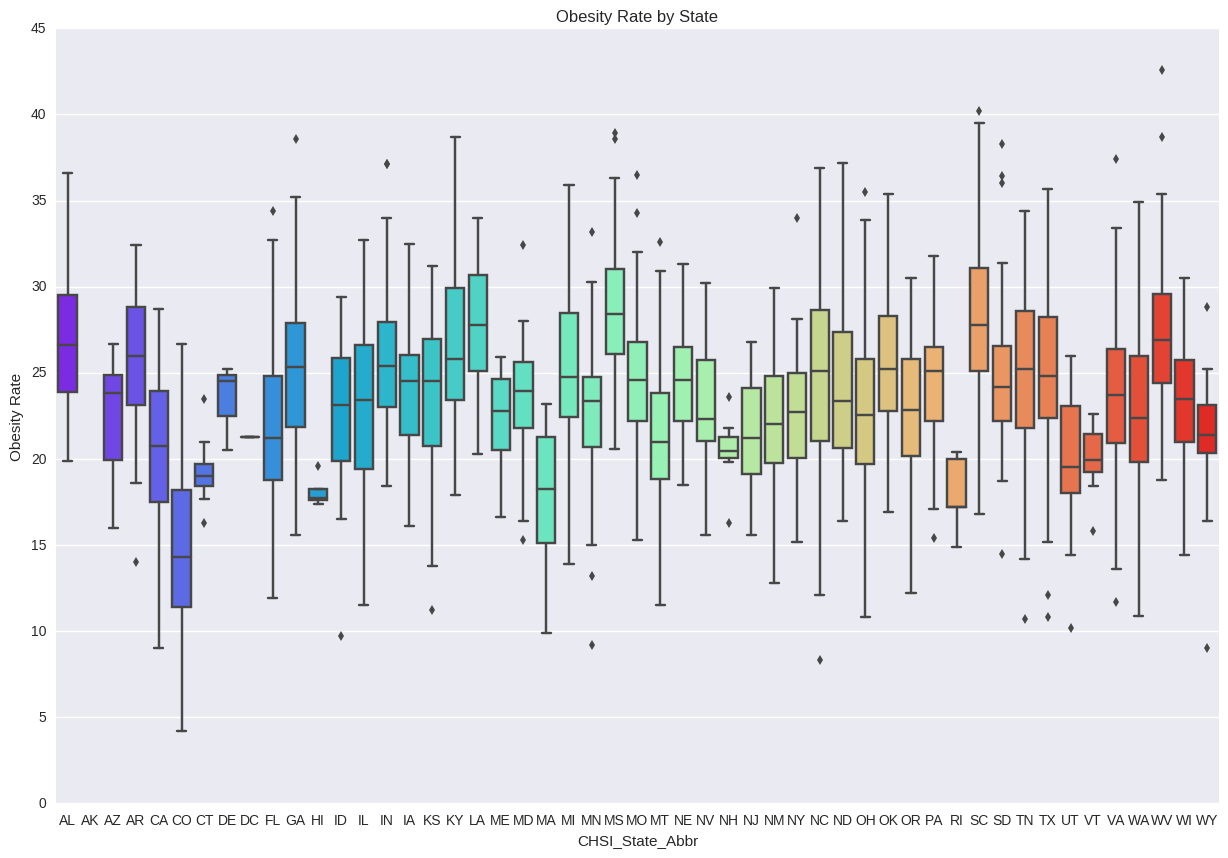

In [97]:
plt.figure(figsize = (15,10))
sns.boxplot(x= risk_care["CHSI_State_Abbr"], y="Obesity", data=risk_care,palette='rainbow')
plt.ylabel("Obesity Rate")
plt.title("Obesity Rate by State");

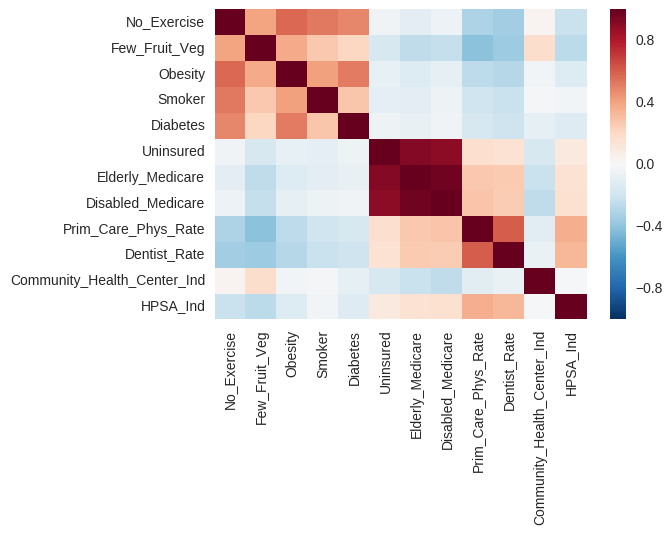

In [98]:
sns.heatmap(r.corr())
plt.figure(figsize=(50, 50));

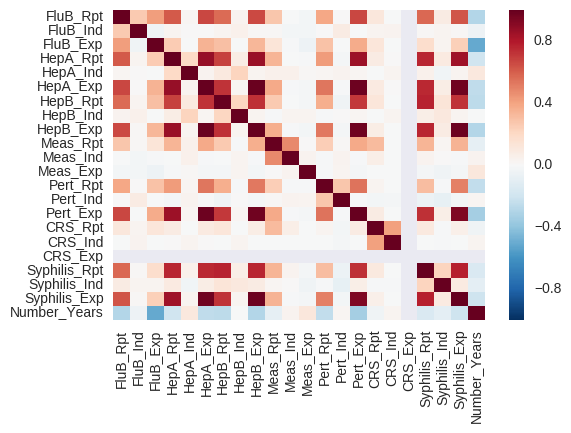

In [99]:
sns.heatmap(preventive2.corr());

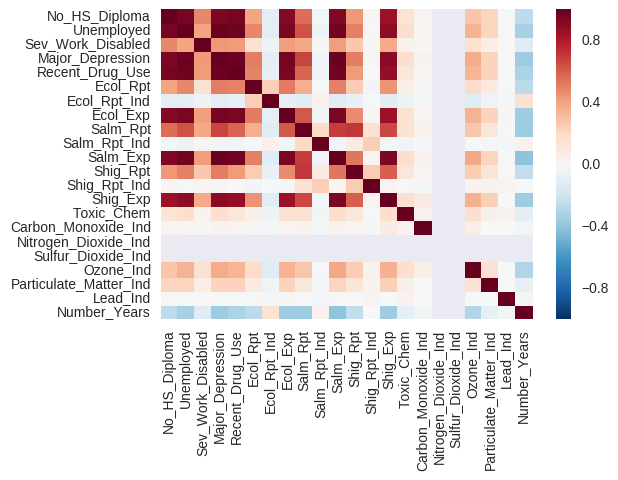

In [100]:
sns.heatmap(environment2.corr());

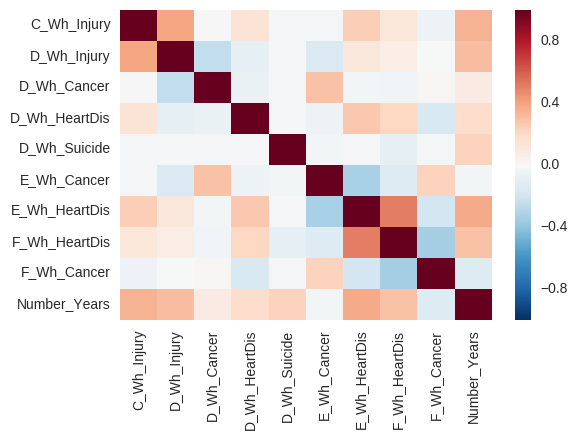

In [101]:
sns.heatmap(deaths2.corr());

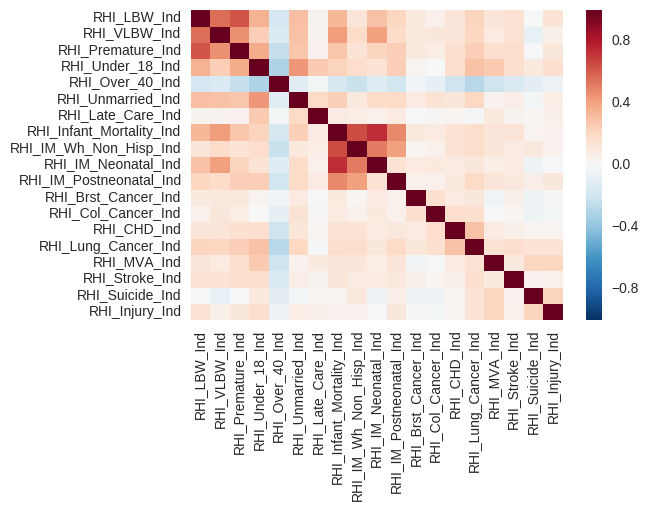

In [102]:
sns.heatmap(importance2.corr());

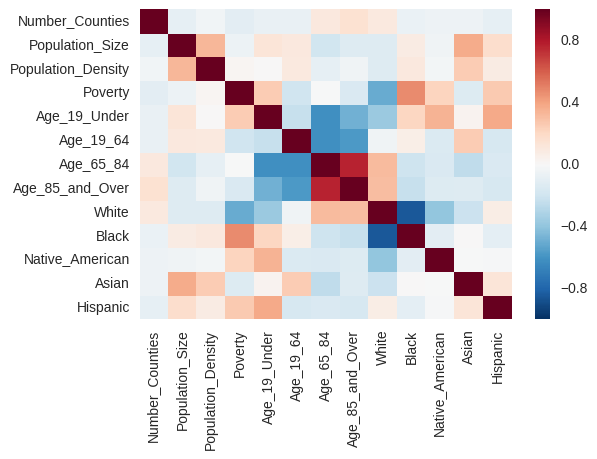

In [103]:
sns.heatmap(demographics.corr());

In [104]:
all_data = pd.concat([risk_care2,demographics2,importance2,preventive2,deaths2,environment2],axis = 1)

In [105]:
all_data.columns

Index(['State_FIPS_Code', 'County_FIPS_Code', 'CHSI_County_Name',
       'CHSI_State_Name', 'CHSI_State_Abbr', 'Strata_ID_Number', 'No_Exercise',
       'Few_Fruit_Veg', 'Obesity', 'Smoker',
       ...
       'Shig_Exp', 'Toxic_Chem', 'Carbon_Monoxide_Ind', 'Nitrogen_Dioxide_Ind',
       'Sulfur_Dioxide_Ind', 'Ozone_Ind', 'Particulate_Matter_Ind', 'Lead_Ind',
       'EH_Time_Span', 'Number_Years'],
      dtype='object', length=108)

In [106]:
all_data = all_data.drop(["EH_Time_Span","ID_Time_Span","LCD_Time_Span","Strata_Determining_Factors"],1)
all_data = all_data.drop(redundant_columns,1)

In [107]:
all_data = all_data.fillna(all_data.median().iloc[0])

In [108]:
def fat(obese):
    if obese > all_data["Obesity"].quantile(.5):
        return 1
    else:
        return 0

In [109]:
from sklearn.cross_validation import train_test_split

x = all_data.drop("Obesity",1)
y = all_data["Obesity"].apply(fat)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 4444)

In [110]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

KNN_accruacy = []
for i in range(1,21):
    neigh = KNeighborsClassifier(n_neighbors = i)
    neigh.fit(x_train, y_train)
    predicts = neigh.predict(x_test)
    KNN_accruacy.append(accuracy_score(y_test,predicts))
    print ("k =", i, "  accuracy score =", accuracy_score(y_test, predicts))

k = 1   accuracy score = 0.558383233533
k = 2   accuracy score = 0.568862275449
k = 3   accuracy score = 0.586826347305
k = 4   accuracy score = 0.571856287425
k = 5   accuracy score = 0.573353293413
k = 6   accuracy score = 0.558383233533
k = 7   accuracy score = 0.576347305389
k = 8   accuracy score = 0.564371257485
k = 9   accuracy score = 0.588323353293
k = 10   accuracy score = 0.589820359281
k = 11   accuracy score = 0.600299401198
k = 12   accuracy score = 0.586826347305
k = 13   accuracy score = 0.579341317365
k = 14   accuracy score = 0.604790419162
k = 15   accuracy score = 0.591317365269
k = 16   accuracy score = 0.600299401198
k = 17   accuracy score = 0.588323353293
k = 18   accuracy score = 0.577844311377
k = 19   accuracy score = 0.588323353293
k = 20   accuracy score = 0.582335329341


In [111]:
from sklearn.linear_model import LogisticRegression

x = all_data.drop("Obesity",1)
y = all_data["Obesity"].apply(fat)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 4444)
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [112]:
lr_pred_mat = model_lr.predict_proba(x_test)
lr_pred_vec = lr_pred_mat[:,1]
predict = model_lr.predict(x_test)
log_accuracy = accuracy_score(y_test,predict)
log_accuracy

0.69161676646706582

In [113]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)
predict = nb.predict(x_test)
nb_accuracy_score = accuracy_score(y_test, predict)
print ("Accuracy Score: " , nb_accuracy_score)

Accuracy Score:  0.531437125749


In [114]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
predict = svc.predict(x_test)
svc_accuracy_score = accuracy_score(y_test, predict)
print ("Accuracy Score: " , svc_accuracy_score)

Accuracy Score:  0.479041916168


In [115]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
predict = dtc.predict(x_test)
dtc_accuracy_score = accuracy_score(y_test, predict)
print ("Accuracy Score: " ,dtc_accuracy_score)

Accuracy Score:  0.669161676647


In [116]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
predict = rf.predict(x_test)
rf_accuracy_score = accuracy_score(y_test, predict)
print ("Accuracy Score: ", rf_accuracy_score)

Accuracy Score:  0.691616766467


In [117]:
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.cross_validation import cross_val_score

models = {}
parameters = {}

models['cart'] = DecisionTreeClassifier(max_depth=7)
models['extratrees'] = ExtraTreeClassifier(max_depth=7)
models['randomForest'] = RandomForestClassifier()
models['adaboostedTrees'] = AdaBoostClassifier()
models['gradboostedTrees'] = GradientBoostingClassifier()

for name,model in list(models.items()):
    scores = cross_val_score(model, x, y, n_jobs=2)
    print('Model: '+name)
    print("Score: " + str(np.mean(scores)))
    print()

Model: gradboostedTrees
Score: 0.713578818842

Model: extratrees
Score: 0.647926662326

Model: cart
Score: 0.654684607018

Model: randomForest
Score: 0.687502500809

Model: adaboostedTrees
Score: 0.705935132946



In [118]:
feature_rank = models['gradboostedTrees'].fit(x,y).feature_importances_
feature_rank

array([ 0.09481817,  0.02849244,  0.03299149,  0.07765064,  0.01619252,
        0.01392338,  0.01308112,  0.02314784,  0.02659028,  0.00195968,
        0.00070336,  0.00491115,  0.00291739,  0.02388875,  0.01704878,
        0.02560086,  0.02774017,  0.01500584,  0.02371242,  0.01757554,
        0.02603314,  0.02425163,  0.00988849,  0.03230198,  0.        ,
        0.0037167 ,  0.        ,  0.00291032,  0.01769197,  0.        ,
        0.0279426 ,  0.00551232,  0.        ,  0.00791945,  0.00366809,
        0.        ,  0.        ,  0.007715  ,  0.00751387,  0.00284387,
        0.00805319,  0.        ,  0.        ,  0.00420643,  0.        ,
        0.        ,  0.01182413,  0.        ,  0.0031849 ,  0.01335805,
        0.        ,  0.00127664,  0.        ,  0.        ,  0.        ,
        0.00905358,  0.00197918,  0.00601534,  0.        ,  0.        ,
        0.        ,  0.00186356,  0.00287379,  0.00405948,  0.        ,
        0.01000684,  0.00960507,  0.01217415,  0.00126995,  0.00

In [119]:
pairs = []
rank = []
predict = all_data.drop("Obesity",axis = 1)
for x, y in zip(predict.columns, feature_rank):
    pairs.append((x,y))
rank = sorted(pairs,key = lambda tup:tup[1])
rank = rank[::-1]
count = 0
for i in rank:
    count +=1
    print (count, i)

1 ('No_Exercise', 0.09481817185182298)
2 ('Diabetes', 0.077650644158057905)
3 ('Toxic_Chem', 0.035590475447073486)
4 ('Smoker', 0.032991494669316938)
5 ('Hispanic', 0.032301975228622513)
6 ('Few_Fruit_Veg', 0.028492440755808712)
7 ('RHI_Late_Care_Ind', 0.027942597534193654)
8 ('Age_19_64', 0.027740171735033407)
9 ('Dentist_Rate', 0.026590281023193971)
10 ('Black', 0.026033136512499423)
11 ('Age_19_Under', 0.025600861849518639)
12 ('Native_American', 0.024251633865498293)
13 ('Population_Density', 0.023888751165570116)
14 ('Age_85_and_Over', 0.023712422920896634)
15 ('Prim_Care_Phys_Rate', 0.023147840892462756)
16 ('Recent_Drug_Use', 0.020060280029029896)
17 ('E_Wh_Cancer', 0.019811910523362931)
18 ('Sev_Work_Disabled', 0.019386534281907845)
19 ('Shig_Exp', 0.018501993092394236)
20 ('No_HS_Diploma', 0.017951175278100737)
21 ('RHI_Over_40_Ind', 0.017691973621751924)
22 ('F_Wh_HeartDis', 0.017618405830112448)
23 ('White', 0.017575538177985173)
24 ('Poverty', 0.017048780593435158)
25 ('Uni

In [120]:
all_data['random1'] = np.random.normal(0,1,len(all_data))
all_data['random2'] = np.random.normal(0,1,len(all_data))
all_data['random3'] = np.random.normal(0,1,len(all_data))
all_data['random4'] = np.random.normal(0,1,len(all_data))

In [121]:
from sklearn.cross_validation import train_test_split

x = all_data.drop("Obesity",1)
y = all_data["Obesity"].apply(fat)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

In [122]:
models = {}
parameters = {}

models['cart'] = DecisionTreeClassifier(max_depth=7)
models['extratrees'] = ExtraTreeClassifier(max_depth=7)
models['randomForest'] = RandomForestClassifier()
models['adaboostedTrees'] = AdaBoostClassifier()
models['gradboostedTrees'] = GradientBoostingClassifier()

for name,model in list(models.items()):
    scores = cross_val_score(model, x, y, n_jobs=2)
    print('Model: '+name)
    print("Score: " + str(np.mean(scores)))
    print()

Model: gradboostedTrees
Score: 0.704136368982

Model: extratrees
Score: 0.639401479024

Model: cart
Score: 0.652437213013

Model: randomForest
Score: 0.683464224179

Model: adaboostedTrees
Score: 0.705483471621



In [123]:
feature_rank = models['randomForest'].fit(x,y).feature_importances_
feature_rank

array([  8.85445460e-02,   2.01896148e-02,   2.33666728e-02,
         5.92348829e-02,   1.30335959e-02,   1.61095526e-02,
         1.54959807e-02,   2.66013039e-02,   1.21630016e-02,
         3.66576229e-03,   1.88666071e-03,   8.82987083e-03,
         1.25962854e-02,   9.29257609e-03,   2.92772741e-02,
         1.57115131e-02,   1.49303191e-02,   1.37508048e-02,
         9.43136208e-03,   2.33535731e-02,   2.02930880e-02,
         9.27203887e-03,   1.51072885e-02,   1.49111019e-02,
         3.43831158e-03,   3.87603467e-03,   2.51750671e-03,
         2.38308647e-02,   8.24429395e-03,   1.94818971e-03,
         9.54137847e-03,   4.56961789e-03,   3.56362920e-03,
         2.06834593e-03,   5.69134803e-03,   3.76472948e-03,
         2.94445856e-03,   5.18950388e-03,   3.47356722e-03,
         4.25475032e-03,   3.24554172e-03,   5.25604205e-03,
         3.11742164e-03,   5.57121030e-03,   9.19826852e-04,
         3.48489459e-03,   1.11350316e-02,   1.07610578e-03,
         8.39924670e-03,

In [124]:
pairs = []
rank = []
predict = all_data.drop("Obesity",axis = 1)
for x, y in zip(predict.columns, feature_rank):
    pairs.append((x,y))
rank = sorted(pairs,key = lambda tup:tup[1])
rank = rank[::-1]
count = 0
for i in rank:
    count +=1
    print (count, i)

1 ('No_Exercise', 0.088544545995529161)
2 ('Diabetes', 0.059234882935274083)
3 ('Poverty', 0.029277274061868593)
4 ('Prim_Care_Phys_Rate', 0.026601303897549854)
5 ('Ecol_Rpt', 0.025973537299570019)
6 ('RHI_Under_18_Ind', 0.023830864728934205)
7 ('Smoker', 0.023366672786892601)
8 ('White', 0.023353573085825523)
9 ('Black', 0.020293087967372093)
10 ('Few_Fruit_Veg', 0.020189614821868956)
11 ('F_Wh_HeartDis', 0.019943593982749863)
12 ('random3', 0.018011956440541998)
13 ('Recent_Drug_Use', 0.017921559890495296)
14 ('Toxic_Chem', 0.017369154886654244)
15 ('random1', 0.016619705061291103)
16 ('Elderly_Medicare', 0.016109552593052127)
17 ('Age_19_Under', 0.015711513055527045)
18 ('Disabled_Medicare', 0.015495980671412512)
19 ('Asian', 0.015107288452895462)
20 ('random2', 0.014975428762579549)
21 ('Age_19_64', 0.014930319091729547)
22 ('Hispanic', 0.014911101880496862)
23 ('Salm_Rpt', 0.01443820071011)
24 ('No_HS_Diploma', 0.014419593979687275)
25 ('Unemployed', 0.013929748836670128)
26 ('ran

In [125]:
from sklearn.cross_validation import train_test_split

x = all_data.drop("Obesity",1)
y = all_data["Obesity"].apply(fat)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)
models = {}
models['randomForest'] = RandomForestClassifier()
feature_rank = models['randomForest'].fit(x,y).feature_importances_
pairs = []
rank2 = []
predict = all_data.drop("Obesity",axis = 1)
for x, y in zip(predict.columns, feature_rank):
    pairs.append((x,y))
rank2 = sorted(pairs,key = lambda tup:tup[1])
rank2 = rank2[::-1]
count = 0
for i in rank2:
    count +=1
    print (count, i)

1 ('No_Exercise', 0.069590982786440519)
2 ('Diabetes', 0.067325157424617296)
3 ('Smoker', 0.031017252854665174)
4 ('Few_Fruit_Veg', 0.027913470647494627)
5 ('Poverty', 0.024787557900586198)
6 ('Black', 0.023388155063232018)
7 ('White', 0.02003836489613459)
8 ('Asian', 0.019909139119127468)
9 ('Age_19_64', 0.019892023544392935)
10 ('Age_19_Under', 0.019575894097538682)
11 ('Prim_Care_Phys_Rate', 0.0189928948803346)
12 ('Hispanic', 0.018830765808930772)
13 ('random3', 0.018258601313500607)
14 ('RHI_CHD_Ind', 0.018193378045029854)
15 ('Recent_Drug_Use', 0.017262426351212168)
16 ('Population_Density', 0.017238398654785606)
17 ('Sev_Work_Disabled', 0.01682693185909457)
18 ('random1', 0.016305333391761653)
19 ('Toxic_Chem', 0.016273475441289299)
20 ('random4', 0.01615622158797797)
21 ('E_Wh_HeartDis', 0.015867942713142593)
22 ('RHI_Over_40_Ind', 0.015329081976046943)
23 ('Age_85_and_Over', 0.015306556935772136)
24 ('No_HS_Diploma', 0.014057425610986848)
25 ('Elderly_Medicare', 0.013928175058

In [126]:
from sklearn.cross_validation import train_test_split

x = all_data.drop("Obesity",1)
y = all_data["Obesity"].apply(fat)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)
models = {}
models['randomForest'] = RandomForestClassifier()
feature_rank = models['randomForest'].fit(x,y).feature_importances_
pairs = []
rank3 = []
predict = all_data.drop("Obesity",axis = 1)
for x, y in zip(predict.columns, feature_rank):
    pairs.append((x,y))
rank3 = sorted(pairs,key = lambda tup:tup[1])
rank3 = rank3[::-1]
count = 0
for i in rank3:
    count +=1
    print (count, i)

1 ('Poverty', 0.049351259647491742)
2 ('Diabetes', 0.047385072902002313)
3 ('No_Exercise', 0.044783659977748316)
4 ('Few_Fruit_Veg', 0.040633215733637727)
5 ('Dentist_Rate', 0.031876705443802847)
6 ('Smoker', 0.024661818937720657)
7 ('F_Wh_HeartDis', 0.021953677288703101)
8 ('Age_65_84', 0.021272183191485741)
9 ('Age_19_64', 0.021190782698420611)
10 ('RHI_Under_18_Ind', 0.019707322927231256)
11 ('Recent_Drug_Use', 0.018804151379142285)
12 ('No_HS_Diploma', 0.018266155481839647)
13 ('Hispanic', 0.018090666618678315)
14 ('Population_Density', 0.01784288441464265)
15 ('Ecol_Rpt', 0.016569694176370657)
16 ('White', 0.016550841604923549)
17 ('Elderly_Medicare', 0.016348472638873041)
18 ('random2', 0.015775076232046121)
19 ('Toxic_Chem', 0.015350306730034458)
20 ('Black', 0.0152150148086831)
21 ('E_Wh_Cancer', 0.014757850215444682)
22 ('random3', 0.014481296902681967)
23 ('random1', 0.013990380352159335)
24 ('Age_19_Under', 0.013918661766838153)
25 ('Asian', 0.013869604322213767)
26 ('RHI_CH

In [127]:
from sklearn.cross_validation import train_test_split

x = all_data.drop("Obesity",1)
y = all_data["Obesity"].apply(fat)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)
models = {}
models['randomForest'] = RandomForestClassifier()
feature_rank = models['randomForest'].fit(x,y).feature_importances_
pairs = []
rank4 = []
predict = all_data.drop("Obesity",axis = 1)
for x, y in zip(predict.columns, feature_rank):
    pairs.append((x,y))
rank4 = sorted(pairs,key = lambda tup:tup[1])
rank4 = rank4[::-1]
count = 0
for i in rank4:
    count +=1
    print (count, i)

1 ('Diabetes', 0.060375847203993249)
2 ('No_Exercise', 0.05181731047693381)
3 ('Poverty', 0.042545095123276186)
4 ('RHI_Over_40_Ind', 0.032178242519096935)
5 ('Few_Fruit_Veg', 0.030486794852689698)
6 ('Smoker', 0.022420083899410064)
7 ('White', 0.021435384717700557)
8 ('Age_19_Under', 0.020458850002133301)
9 ('Ecol_Rpt', 0.019512662015439074)
10 ('Prim_Care_Phys_Rate', 0.018675498386929772)
11 ('Sev_Work_Disabled', 0.018071499204951585)
12 ('random4', 0.017664922218160174)
13 ('Population_Density', 0.017491771279993032)
14 ('Age_19_64', 0.017314238870072562)
15 ('Hispanic', 0.017082591281544622)
16 ('Dentist_Rate', 0.016756558990661002)
17 ('Ecol_Exp', 0.016377834014181268)
18 ('RHI_MVA_Ind', 0.016374582040717865)
19 ('Salm_Exp', 0.01597583907321749)
20 ('F_Wh_HeartDis', 0.015957775180776141)
21 ('RHI_CHD_Ind', 0.015916852674327089)
22 ('Unemployed', 0.015374846345823387)
23 ('No_HS_Diploma', 0.014653218749085071)
24 ('Black', 0.01456986229356628)
25 ('Elderly_Medicare', 0.014083860441

In [128]:
from sklearn.cross_validation import train_test_split

x = all_data.drop("Obesity",1)
y = all_data["Obesity"].apply(fat)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)
models = {}
models['randomForest'] = RandomForestClassifier()
feature_rank = models['randomForest'].fit(x,y).feature_importances_
pairs = []
rank5 = []
predict = all_data.drop("Obesity",axis = 1)
for x, y in zip(predict.columns, feature_rank):
    pairs.append((x,y))
rank5 = sorted(pairs,key = lambda tup:tup[1])
rank5 = rank5[::-1]
count = 0
for i in rank5:
    count +=1
    print (count, i)

1 ('Diabetes', 0.080084161885893679)
2 ('No_Exercise', 0.061399803417426159)
3 ('Ecol_Rpt', 0.02891364661678893)
4 ('Smoker', 0.02285671399783103)
5 ('Asian', 0.021948134283239374)
6 ('RHI_Over_40_Ind', 0.021243232388906869)
7 ('White', 0.020877248737860919)
8 ('Prim_Care_Phys_Rate', 0.020451787477853523)
9 ('Few_Fruit_Veg', 0.01986713884382461)
10 ('F_Wh_HeartDis', 0.018686233391527425)
11 ('Age_19_64', 0.018465951881678676)
12 ('RHI_Under_18_Ind', 0.017421947639391717)
13 ('Hispanic', 0.017348569373557377)
14 ('Dentist_Rate', 0.016885522875988719)
15 ('Population_Density', 0.016813309437495066)
16 ('Black', 0.01614767210731715)
17 ('Poverty', 0.016048273346804223)
18 ('Unemployed', 0.015469220727035091)
19 ('Age_19_Under', 0.015371965298842544)
20 ('Recent_Drug_Use', 0.015227469838158158)
21 ('Toxic_Chem', 0.015120216234354658)
22 ('random3', 0.015082108352339862)
23 ('Sev_Work_Disabled', 0.01502941926501151)
24 ('random1', 0.014935080355727779)
25 ('E_Wh_HeartDis', 0.014732262239537

In [129]:
complete_rank = []
count = 0
for i in rank:
    complete_rank.append(list(i))
    for a,b,c,d in zip(rank2,rank3,rank4,rank5):
        if i[0] == a[0]:
            complete_rank[count][1] += a[1]
        elif i[0] == b[0]:
            complete_rank[count][1] += b[1]
        elif i[0] == c[0]:
            complete_rank[count][1] += c[1]
        elif i[0] == d[0]:
            complete_rank[count][1] += d[1]
        else:
            pass
    count += 1

In [130]:
complete_rank = sorted(complete_rank, key = lambda x: float(x[1]))[::-1]

In [131]:
complete_rank

[['No_Exercise', 0.25473649923665181],
 ['Diabetes', 0.18693588756388463],
 ['Poverty', 0.16200946008002695],
 ['Ecol_Rpt', 0.10365681048434018],
 ['Smoker', 0.10190245857710946],
 ['Few_Fruit_Veg', 0.098457019165877888],
 ['Prim_Care_Phys_Rate', 0.096925959749086993],
 ['Dentist_Rate', 0.091468846224353681],
 ['Black', 0.089613792240170645],
 ['F_Wh_HeartDis', 0.088251812381285683],
 ['RHI_Over_40_Ind', 0.086894276998517456],
 ['Age_19_Under', 0.085036884220879724],
 ['Asian', 0.082830641723359633],
 ['Recent_Drug_Use', 0.081008021629941321],
 ['Population_Density', 0.078678939880549956],
 ['No_HS_Diploma', 0.076050961433867525],
 ['random4', 0.074023793168115234],
 ['random1', 0.073825538201278518],
 ['Age_65_84', 0.072809735436402762],
 ['RHI_Under_18_Ind', 0.07111624053892171],
 ['Age_19_64', 0.070602533387873714],
 ['random2', 0.069541941241203969],
 ['Hispanic', 0.068915125589650572],
 ['Sev_Work_Disabled', 0.068298623217734319],
 ['Unemployed', 0.064984437232797121],
 ['E_Wh_Hea

In [132]:
best_features = []
for i in complete_rank:
    if "random" not in i[0]:
        best_features.append(i[0])
    else:
        break

In [133]:
x = all_data[best_features]
y = all_data["Obesity"].apply(fat)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

In [134]:
KNN_accuracy = []
for i in range(1,21):
    neigh = KNeighborsClassifier(n_neighbors = i)
    neigh.fit(x_train, y_train)
    predicts = neigh.predict(x_test)
    KNN_accuracy.append(accuracy_score(y_test,predicts))
    print ("k =", i, "  accuracy score =", accuracy_score(y_test, predicts))

k = 1   accuracy score = 0.594311377246
k = 2   accuracy score = 0.562874251497
k = 3   accuracy score = 0.624251497006
k = 4   accuracy score = 0.60628742515
k = 5   accuracy score = 0.630239520958
k = 6   accuracy score = 0.62874251497
k = 7   accuracy score = 0.64371257485
k = 8   accuracy score = 0.64371257485
k = 9   accuracy score = 0.658682634731
k = 10   accuracy score = 0.658682634731
k = 11   accuracy score = 0.666167664671
k = 12   accuracy score = 0.667664670659
k = 13   accuracy score = 0.666167664671
k = 14   accuracy score = 0.678143712575
k = 15   accuracy score = 0.696107784431
k = 16   accuracy score = 0.682634730539
k = 17   accuracy score = 0.681137724551
k = 18   accuracy score = 0.682634730539
k = 19   accuracy score = 0.679640718563
k = 20   accuracy score = 0.682634730539


In [135]:
nb = GaussianNB()
nb.fit(x_train, y_train)
predict = nb.predict(x_test)
nb_accuracy_score = accuracy_score(y_test, predict)
print ("Accuracy Score: " , nb_accuracy_score)

Accuracy Score:  0.633233532934


In [136]:
svc = SVC()
svc.fit(x_train, y_train)
predict = svc.predict(x_test)
svc_accuracy_score = accuracy_score(y_test, predict)
print ("Accuracy Score: " , svc_accuracy_score)

Accuracy Score:  0.47754491018


In [137]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
predict = dtc.predict(x_test)
dtc_accuracy_score = accuracy_score(y_test, predict)
print ("Accuracy Score: " ,dtc_accuracy_score)

Accuracy Score:  0.640718562874


In [138]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
predict = rf.predict(x_test)
rf_accuracy_score = accuracy_score(y_test, predict)
print ("Accuracy Score: ", rf_accuracy_score)

Accuracy Score:  0.699101796407


In [139]:
extra = ExtraTreeClassifier()
extra.fit(x_train, y_train)
predict = extra.predict(x_test)
extra_accuracy_score = accuracy_score(y_test, predict)
print ("Accuracy Score: ", extra_accuracy_score)

Accuracy Score:  0.646706586826


In [140]:
ada = AdaBoostClassifier()
ada.fit(x_train, y_train)
predict = ada.predict(x_test)
ada_accuracy_score = accuracy_score(y_test, predict)
print ("Accuracy Score: ", ada_accuracy_score)

Accuracy Score:  0.711077844311


In [141]:
grad = GradientBoostingClassifier()
grad.fit(x_train, y_train)
predict = grad.predict(x_test)
grad_accuracy_score = accuracy_score(y_test, predict)
print ("Accuracy Score: ", grad_accuracy_score)

Accuracy Score:  0.706586826347


In [142]:
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)
lr_pred_mat = model_lr.predict_proba(x_test)
lr_pred_vec = lr_pred_mat[:,1]
predict = model_lr.predict(x_test)
log_accuracy = accuracy_score(y_test,predict)
log_accuracy

0.70958083832335328

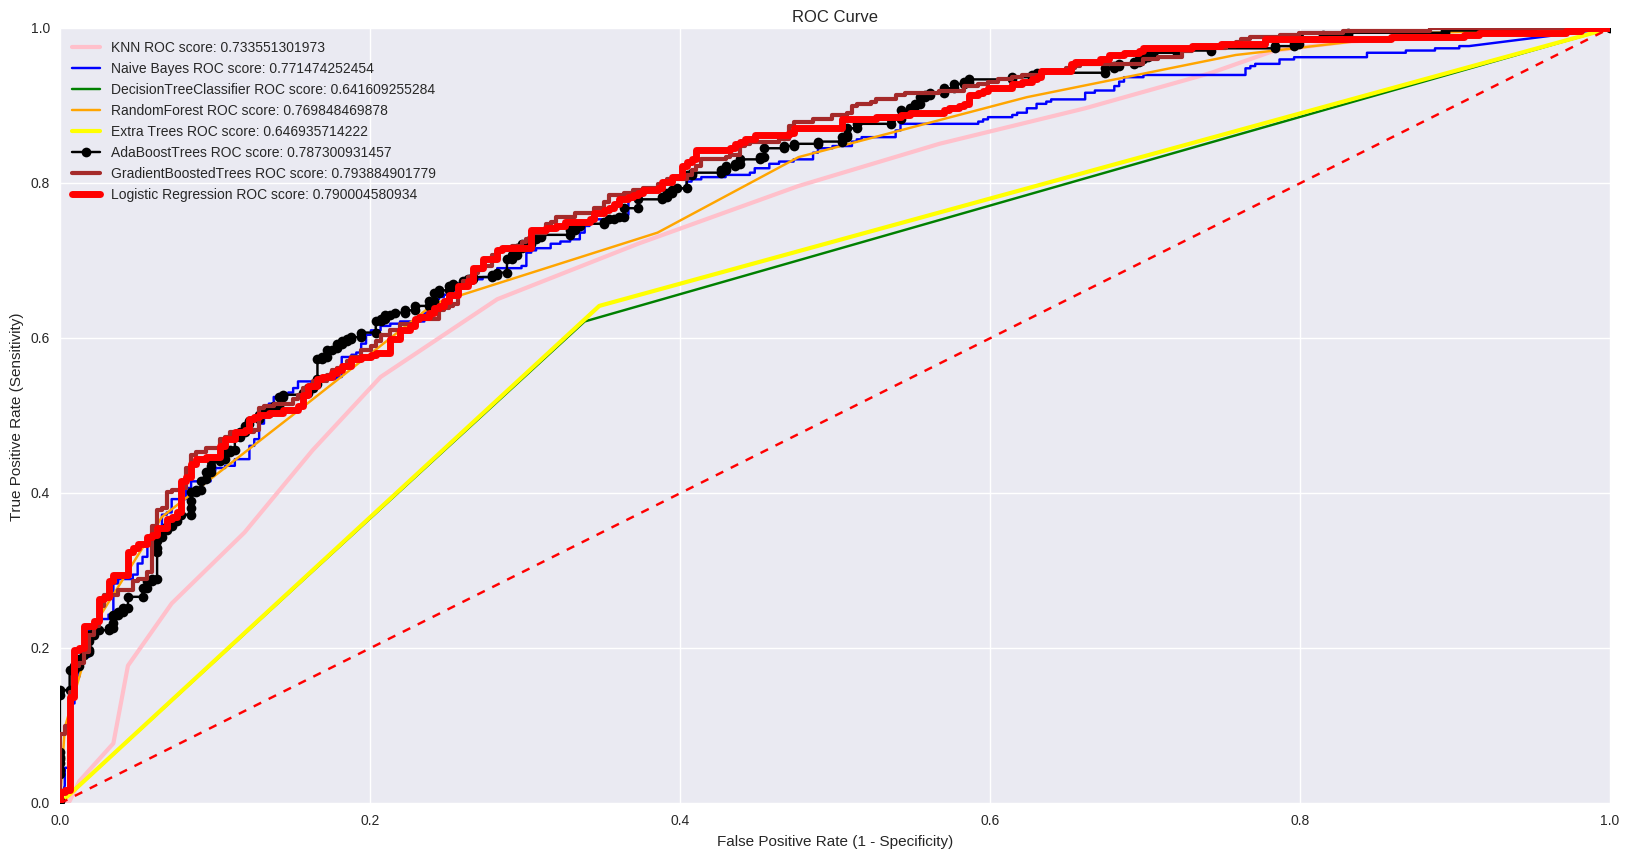

In [143]:
from sklearn.metrics import roc_curve, roc_auc_score

classifiers = [neigh,nb,svc,dtc,rf,extra,ada,grad,model_lr]


pred_vals1 = neigh.predict_proba(x_test)
pred_vals2 = nb.predict_proba(x_test)
pred_vals3 = dtc.predict_proba(x_test)
pred_vals4 = rf.predict_proba(x_test)
pred_vals5 = extra.predict_proba(x_test)
pred_vals6 = ada.predict_proba(x_test)
pred_vals7 = grad.predict_proba(x_test)
pred_vals8 = model_lr.predict_proba(x_test)

plt.figure(figsize = (20,10))
fpr, tpr, thresholds = roc_curve(y_test,pred_vals1[:,1])
plt.plot(fpr, tpr, label = "KNN ROC score: "+str(roc_auc_score(y_test,pred_vals1[:,1])), color = "pink", lw = 3);

fpr, tpr, thresholds = roc_curve(y_test,pred_vals2[:,1])
plt.plot(fpr, tpr, label = "Naive Bayes ROC score: "+str(roc_auc_score(y_test,pred_vals2[:,1])), color = "blue");

fpr, tpr, thresholds = roc_curve(y_test,pred_vals3[:,1])
plt.plot(fpr, tpr, label = "DecisionTreeClassifier ROC score: "+ str(roc_auc_score(y_test,pred_vals3[:,1])),color = "green");

fpr, tpr, thresholds = roc_curve(y_test,pred_vals4[:,1])
plt.plot(fpr, tpr, label = "RandomForest ROC score: "+str(roc_auc_score(y_test,pred_vals4[:,1])),color = "orange");

fpr, tpr, thresholds = roc_curve(y_test,pred_vals5[:,1])
plt.plot(fpr, tpr, label = "Extra Trees ROC score: " + str(roc_auc_score(y_test,pred_vals5[:,1])),color = "yellow", lw = 3);

fpr, tpr, thresholds = roc_curve(y_test,pred_vals6[:,1])
plt.plot(fpr, tpr, label = "AdaBoostTrees ROC score: "+ str(roc_auc_score(y_test,pred_vals6[:,1])), color = "black", marker = "o");

fpr, tpr, thresholds = roc_curve(y_test,pred_vals7[:,1])
plt.plot(fpr, tpr, label = "GradientBoostedTrees ROC score: "+str(roc_auc_score(y_test,pred_vals7[:,1])),color = "brown", lw = 3);

fpr, tpr, thresholds = roc_curve(y_test,pred_vals8[:,1])
plt.plot(fpr, tpr, label = "Logistic Regression ROC score: "+str(roc_auc_score(y_test,pred_vals8[:,1])),color = "red", lw = 5);
plt.plot(fpr,fpr,'r--');

plt.xlabel("False Positive Rate (1 - Specificity)");
plt.ylabel("True Positive Rate (Sensitivity)");
plt.title("ROC Curve")

plt.legend(loc = 0);

In [144]:
def pr_curve(truthvec, scorevec, digit_prec=2):
    threshvec = np.unique(np.round(scorevec,digit_prec))
    numthresh = len(threshvec)
    tpvec = np.zeros(numthresh)
    fpvec = np.zeros(numthresh)
    fnvec = np.zeros(numthresh)

    for i in range(numthresh):
        thresh = threshvec[i]
        tpvec[i] = sum(truthvec[scorevec>=thresh])
        fpvec[i] = sum(1-truthvec[scorevec>=thresh])
        fnvec[i] = sum(truthvec[scorevec<thresh])
    recallvec = tpvec/(tpvec + fnvec)
    precisionvec = tpvec/(tpvec + fpvec)
    plt.plot(precisionvec,recallvec)
    plt.axis([0, 1, 0, 1])
    plt.xlabel("Precision")
    plt.ylabel("Recall")
    return (recallvec, precisionvec, threshvec)

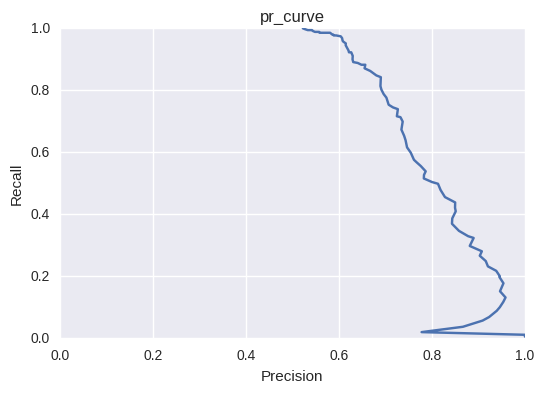

In [145]:
pr_curve(y_test,lr_pred_vec);
plt.title("pr_curve");

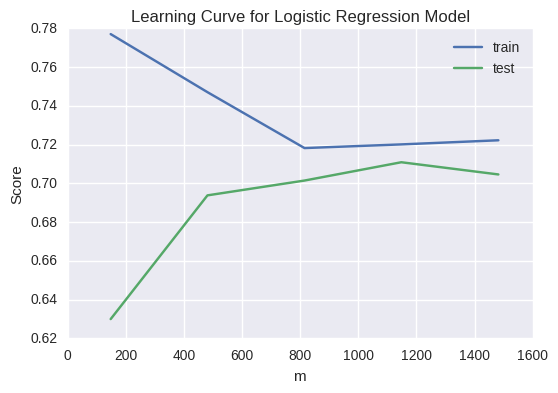

In [146]:
from sklearn.learning_curve import learning_curve

learn = learning_curve(model_lr,x,y)

m = learn[0]
train_err = learn[1]
ts_err = learn[2]

train_cv_err = np.mean(train_err,axis = 1)
test_cv_err = np.mean(ts_err, axis=1)

plt.plot(m,train_cv_err, label = "train")
plt.plot(m,test_cv_err, label = "test")
plt.title("Learning Curve for Logistic Regression Model")
plt.xlabel("m")
plt.ylabel("Score")

plt.legend(loc = 0);

In [147]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[224  95]
 [ 99 250]]


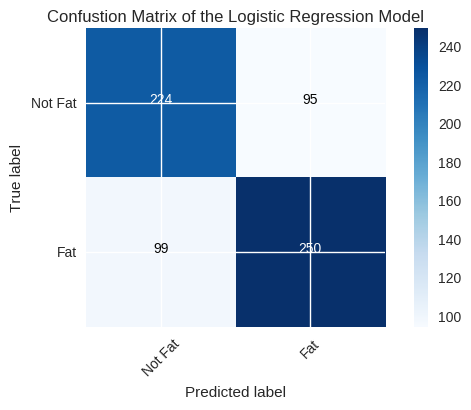

In [148]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,predict)
class_names = ["Not Fat", "Fat"]

plt.figure()
plot_confusion_matrix(cm, classes = class_names, title = "Confustion Matrix of the Logistic Regression Model")

plt.show()

In [150]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print ("Accuracy Score: ",accuracy_score(y_test,predict))
print ("Recall: ", recall_score(y_test, predict))
print ("Precision: ", precision_score(y_test, predict))
print ("F1: ", f1_score(y_test, predicts))

Accuracy Score:  0.709580838323
Recall:  0.716332378223
Precision:  0.724637681159
F1:  0.681681681682


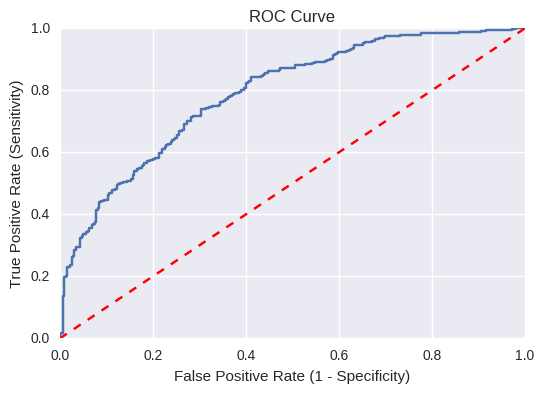

In [151]:
from sklearn.metrics import roc_curve, roc_auc_score

model = LogisticRegression()
model.fit(x_train, y_train)
pred_vals = model.predict_proba(x_test)

fpr, tpr, thresholds = roc_curve(y_test,pred_vals[:,1])
plt.plot(fpr, tpr);
plt.plot(fpr,fpr, 'r--');
plt.xlabel("False Positive Rate (1 - Specificity)");
plt.ylabel("True Positive Rate (Sensitivity)");
plt.title("ROC Curve");

In [152]:
roc_auc_score(y_test,pred_vals[:,1])

0.79000458093433101

In [153]:
from sklearn.metrics import classification_report
print (classification_report(y_test,model.predict(x_test)))

             precision    recall  f1-score   support

          0       0.69      0.70      0.70       319
          1       0.72      0.72      0.72       349

avg / total       0.71      0.71      0.71       668



In [154]:
##Take in the zipcodes for each county from another data set
c = pd.read_csv("chlamydia.csv",sep = '\t')

In [155]:
zip_code = pd.DataFrame(c["id"])
Obesity = pd.DataFrame(risk_care["Obesity"])
Smoker = pd.DataFrame(risk_care["Smoker"])
Obesity = pd.concat([zip_code,Obesity],1)
Smoker = pd.concat([zip_code,Smoker],1)

In [156]:
Obesity.to_csv("Obesity.csv", index = False)
Smoker.to_csv("Smoker.csv",index = False)

In [157]:
## We will use the model with the best features to predict whether or not the counties with miss data is above or below the median obesity rate
rows = nans.index.values
demographics3 = demographics.ix[rows]
environment3 = environment.ix[rows]
deaths3 = deaths.ix[rows]
preventive3 = preventive.ix[rows]
importance3 = importance.ix[rows]

In [158]:
nans_all_data = pd.concat([nans,demographics3, environment3, deaths3, preventive3, importance3], 1)
nans_all_data = nans_all_data[best_features]
nans_all_data = nans_all_data.fillna(nans_all_data.median().iloc[0])

In [159]:
nans_all_data.describe()

,No_Exercise,Diabetes,Poverty,Ecol_Rpt,Smoker,Few_Fruit_Veg,Prim_Care_Phys_Rate,Dentist_Rate,Black,F_Wh_HeartDis,RHI_Over_40_Ind,Age_19_Under,Asian,Recent_Drug_Use,Population_Density,No_HS_Diploma
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.00000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,25.289586,16.220992,14.482715,1.443839,24.127372,29.805834,40.811014,24.149945,9.90458,33.688059,8.466630,24.565649,0.701527,788.018539,68.174482,2572.402399
std,2.281726,8.763616,5.175882,5.484233,3.589302,15.801149,45.539876,26.343111,16.89394,5.020455,6.450762,3.864050,2.562055,1111.437481,327.542497,2823.391106
min,11.400000,1.000000,3.000000,0.000000,4.200000,25.350000,0.000000,0.000000,0.00000,17.000000,5.000000,1.400000,0.000000,2.000000,0.000000,7.000000
25%,25.350000,8.100000,10.600000,0.000000,25.350000,25.350000,14.500000,9.600000,0.40000,31.000000,5.000000,22.300000,0.200000,271.000000,6.000000,796.000000
50%,25.350000,13.700000,13.700000,0.000000,25.350000,25.350000,33.200000,20.100000,1.70000,33.000000,7.000000,24.100000,0.300000,542.000000,20.000000,1883.000000
75%,25.350000,25.350000,17.800000,1.000000,25.350000,25.350000,53.600000,32.400000,10.40000,37.000000,7.000000,26.400000,0.600000,950.000000,41.000000,3410.000000
max,39.100000,25.350000,36.200000,110.000000,35.100000,96.400000,571.100000,377.900000,86.00000,57.000000,25.350000,47.200000,55.900000,20542.000000,5418.000000,36849.000000


In [160]:
all_data2 = pd.concat([risk_care,demographics,importance,preventive,deaths,environment],axis = 1)
predictors = all_data2[best_features].fillna(all_data2.median().iloc[0])
final_model = pd.concat([predictors,pd.DataFrame(all_data2["Obesity"])],1)

In [161]:
y_train = final_model.Obesity[final_model.Obesity.isnull() == False].apply(fat)
y_test = final_model.Obesity[final_model.Obesity.isnull() == True]

x_train = final_model[best_features][final_model.Obesity.isnull() == False]
x_test = final_model[best_features][final_model.Obesity.isnull() == True]

In [162]:
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)
lr_pred_mat = model_lr.predict_proba(x_test)
lr_pred_vec = lr_pred_mat[:,1]
predict = model_lr.predict(x_test)

In [163]:
x_test.columns

Index(['No_Exercise', 'Diabetes', 'Poverty', 'Ecol_Rpt', 'Smoker',
       'Few_Fruit_Veg', 'Prim_Care_Phys_Rate', 'Dentist_Rate', 'Black',
       'F_Wh_HeartDis', 'RHI_Over_40_Ind', 'Age_19_Under', 'Asian',
       'Recent_Drug_Use', 'Population_Density', 'No_HS_Diploma'],
      dtype='object')

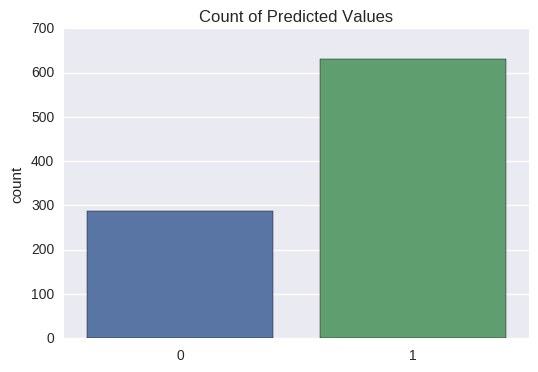

In [164]:
sns.countplot(predict);
plt.title("Count of Predicted Values");

In [165]:
count0 = 0
count1 = 0
for i in predict:
    if i == 0:
        count0 += 1
    else:
        count1 += 1

In [166]:
print (count0, count1)

287 630


In [167]:
235/682

0.34457478005865105

In [168]:
def fat2(obese):
    if obese > all_data["Obesity"].quantile(.5):
        return 1
    elif obese <= all_data["Obesity"].quantile(.5):
        return 0
    else:
        pass

In [169]:
w = Obesity["Obesity"].apply(fat2)

In [170]:
binomial = []
count = 0
for i in w:
    if i == float(1):
        binomial.append(i)
    elif i == float(0):
        binomial.append(i)
    else:
        binomial.append(predict[count])
        count += 1

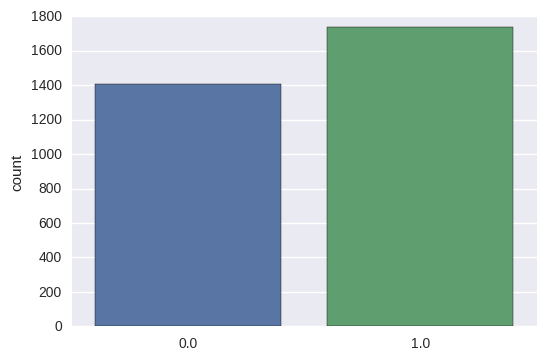

In [171]:
sns.countplot(binomial)

In [172]:
predictions = pd.DataFrame({"value":binomial})
predictions_with_zip_code = pd.concat([Obesity["id"],predictions],1)
predictions_with_zip_code.to_csv("final.csv", index = False)

In [173]:
model_lr.coef_

array([[  6.89002496e-02,   1.78369104e-01,   7.25239243e-04,
          4.45942506e-03,  -1.64574808e-02,   9.47140429e-03,
         -7.01492493e-03,  -2.59913517e-03,   3.54042998e-02,
         -2.67335946e-02,  -2.07819709e-01,  -3.22081454e-02,
         -7.01321869e-02,  -7.95835677e-05,  -4.42322248e-05,
          2.21086116e-05]])